In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential,layers
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

print("Num GPUs Available: ", len(tf.config.list_physical_devices()))
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

Default GPU Device:/device:GPU:0
Num GPUs Available:  2
2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
cars=os.listdir('CarsDataset/train')
def one_hot_enc(car_name):
    car=os.listdir('CarsDataset/train')
    one_hot=np.zeros((1,7))
    one_hot[0,car.index(car_name)]=1
    one_hot = np.asarray(one_hot).astype('int32')
    return one_hot

In [5]:
def dataload(t):
    x=[]
    y=[]
    cars=os.listdir('CarsDataset/{}'.format(t))
    for i in cars:
        examples=os.listdir('CarsDataset/{}/{}'.format(t,i))
        for j in examples:
            im=np.array(Image.open(r"CarsDataset\{}\{}\{}".format(t,i,j)).resize((128, 128)))/255
#             im=im.resize((128, 128), Image.LANCZOS)
#             ar=np.asarray(im)
#             ar=ar.reshape(-1)
            
            if im.shape != (128, 128, 3):
                continue 
            im=(im.reshape((1,128*128*3)).T)
# #             ar = np.asarray(ar).astype('int32')
            x.append(im)
            y.append(one_hot_enc(i))
#     x = np.array(x)
#     y = np.array(y)    
    return x,y

In [6]:
x,y=dataload('train')
# x = np.asarray(x).astype('float32')
# y = np.asarray(y).astype('float32')
print("Training data",len(x))
print("Training labels",len(y))
x

Training data 3348
Training labels 3348


[array([[0.18039216],
        [0.21176471],
        [0.14901961],
        ...,
        [0.37254902],
        [0.42352941],
        [0.44705882]]),
 array([[0.40392157],
        [0.31372549],
        [0.18823529],
        ...,
        [0.28627451],
        [0.2745098 ],
        [0.30980392]]),
 array([[0.69411765],
        [0.67843137],
        [0.64313725],
        ...,
        [0.4       ],
        [0.40392157],
        [0.41176471]]),
 array([[0.10588235],
        [0.0745098 ],
        [0.06666667],
        ...,
        [0.18431373],
        [0.18431373],
        [0.19215686]]),
 array([[0.92156863],
        [0.9254902 ],
        [0.90588235],
        ...,
        [0.81176471],
        [0.67843137],
        [0.63137255]]),
 array([[0.00392157],
        [0.34117647],
        [0.54117647],
        ...,
        [0.49411765],
        [0.49019608],
        [0.4745098 ]]),
 array([[0.84705882],
        [0.85098039],
        [0.87058824],
        ...,
        [0.5254902 ],
        [0.498039

In [9]:

x=np.array(x)
y = np.array(y)    
randomize = np.arange(len(x))
np.random.shuffle(randomize)
x = x[randomize]
y = y[randomize]
print(x.shape)
print(y.shape)
randomize
y

(3348, 49152, 1)
(3348, 1, 7)


array([[[0, 0, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 1]],

       ...,

       [[0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0]]])

[[0 0 0 0 1 0 0]]


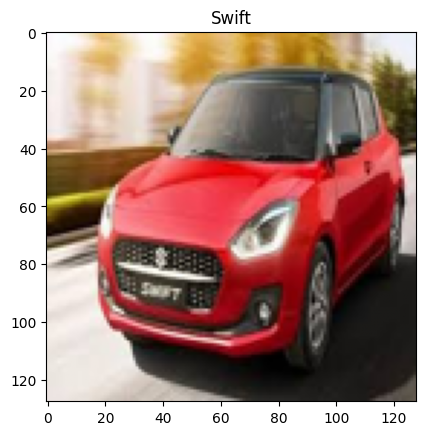

In [10]:
# print(x.shape)
# print(y.shape)
x=x.reshape((3348,1,49152))
y=y.reshape((3348,1,7))
temp=3300
plt.imshow(x[temp].reshape(128,128,3))
plt.title(cars[int((np.where(y[temp]==1))[1])])
print(y[3300])

In [11]:
# im=np.array(Image.open(r"CarsDataset\train\Audi\69.jpg").resize((128, 128)))
# print(im.shape)
# x=im.reshape((-1,1)).T
# y=one_hot_enc('Audi')
# print(x.shape,y.shape)

# x=np.array(x)
# y = np.array(y) 

In [12]:
x_test,y_test=dataload('test')
x_test=np.array(x_test)
y_test= np.array(y_test)   

In [13]:
model=Sequential(
[
#     layers.Flatten(input_shape=( 49152,1)),
    Dense(128,'relu'),
    Dense(128,'relu'),
    Dense(64,'relu'),
    Dense(7,'linear')
]
)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)
             ,optimizer=Adam(lr_schedule),metrics=['accuracy']
             )
model.fit(x,y,validation_split=0.3,epochs=50,callbacks=[EarlyStopping(monitor='val_loss',patience=5,verbose=1,)])

Epoch 1/50
74/74 [==============================] - 5s 21ms/step - loss: 4.0432 - accuracy: 0.2313 - val_loss: 2.2975 - val_accuracy: 0.1184
Epoch 2/50
74/74 [==============================] - 1s 12ms/step - loss: 2.0324 - accuracy: 0.2851 - val_loss: 2.0428 - val_accuracy: 0.2418
Epoch 3/50
74/74 [==============================] - 1s 12ms/step - loss: 1.7124 - accuracy: 0.3679 - val_loss: 1.7878 - val_accuracy: 0.3234
Epoch 4/50
74/74 [==============================] - 1s 12ms/step - loss: 1.7056 - accuracy: 0.3969 - val_loss: 1.8462 - val_accuracy: 0.3463
Epoch 5/50
74/74 [==============================] - 1s 11ms/step - loss: 1.5297 - accuracy: 0.4285 - val_loss: 1.7723 - val_accuracy: 0.3751
Epoch 6/50
74/74 [==============================] - 1s 11ms/step - loss: 1.5227 - accuracy: 0.4503 - val_loss: 1.9310 - val_accuracy: 0.3612
Epoch 7/50
74/74 [==============================] - 1s 12ms/step - loss: 1.4354 - accuracy: 0.4746 - val_loss: 1.6908 - val_accuracy: 0.3781
Epoch 8/50
74

In [23]:
print(x_test.shape,y_test.shape)
x_test=x_test.reshape((812,1,49152))
y_test=y_test.reshape((812,1,7))
loss, accuracy = model.evaluate(x_test, y_test)

(812, 1, 49152) (812, 1, 7)
26/26 [==============================] - 0s 7ms/step - loss: 2.0880 - accuracy: 0.4027
